In [97]:
Sys.setlocale("LC_ALL", 'Persian')

options(scipen=999)


library(plyr)
library(caret)
library(class)
library(forecast)
library(KernelKnn)
library(kknn)
library(rpart)
library(rpart.plot)
library(randomForest)
library(adabag)
library(gbm)
library(plotmo)
library(psych)
library(neuralnet)

[1] "LC_COLLATE=Persian_Iran.1256;LC_CTYPE=Persian_Iran.1256;LC_MONETARY=Persian_Iran.1256;LC_NUMERIC=C;LC_TIME=Persian_Iran.1256"

Warning message:
"package 'neuralnet' was built under R version 4.3.2"


In [23]:
data = readxl::read_excel('D:\\project\\Visualization-and-Data-Analyzing-1-master\\Decision Tree\\Iran_Maskan_koll.xlsx')

In [24]:
head(data)

کد قرارداد,نوع قرارداد,استان,شهرستان,نوع ملک,منطقه شهرداری,نوع کاربری,مساحت,درصد,قیمت,قیمت یک مترمربع,عمر بنا,نوع اسکلت,تاریخ ثبت قرارداد,شش رقم نخست کد پستی
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,3000000,36144.58,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,1080000,12000.00,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,10000000,204081.63,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,3240000,40039.55,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,750000,9375.00,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,5500000,55000.00,0,بتوني,1399/04/01,381333


In [25]:
str(data)

tibble [43,133 x 15] (S3: tbl_df/tbl/data.frame)
 $ کد قرارداد         : chr [1:43133] "19136381" "19140513" "19192568" "19202902" ...
 $ نوع قرارداد        : chr [1:43133] "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" ...
 $ استان              : chr [1:43133] "زنجان" "زنجان" "زنجان" "زنجان" ...
 $ شهرستان            : chr [1:43133] "ابهر" "ابهر" "ابهر" "ابهر" ...
 $ نوع ملک            : chr [1:43133] "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" ...
 $ منطقه شهرداري      : num [1:43133] NA NA NA NA NA NA NA NA NA 4 ...
 $ نوع کاربري         : chr [1:43133] "مسکوني" "مسکوني" "مسکوني" "مسکوني" ...
 $ مساحت              : num [1:43133] 83 90 49 80.9 80 ...
 $ درصد               : chr [1:43133] "100" "100" "100" "100" ...
 $ قيمت               : num [1:43133] 3000000 1080000 10000000 3240000 750000 ...
 $ قيمت يک مترمربع    : chr [1:43133] "36144.58" "12000.00" "204081.63" "40039.55" ...
 $ عمر بنا            : num [1:43133] 15 9 10 9 10 0 1 6 19 0 ...


In [28]:
names(data)[1] = 'contrat_number'
names(data)[2] = 'contract_type'
names(data)[3] = 'state'
names(data)[4] = 'city'
names(data)[5] = 'property_type'
names(data)[6] = 'district_number'
names(data)[7] = 'usage_type'
names(data)[8] = 'area'
names(data)[9] = 'percentage'
names(data)[10] = 'price'
names(data)[11] = 'price_per_square'
names(data)[12] = 'building_age'
names(data)[13] = 'skeleton_type'
names(data)[14] = 'contract_date'
names(data)[15] = 'postal_code'

data = data[!is.na(data$contrat_number),]
data$percentage = as.numeric(data$percentage)
data$price = as.numeric(data$price) / 1000
data$price_per_square = as.numeric(data$price_per_square) / 10000

In [29]:
khoozestan = data[data$state == 'خوزستان',]

head(khoozestan)

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19048971,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,NA,مسکوني,75.00,100,1950,2.600000,2,بدون اسکلت,1399/04/01,617563
19052727,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,2,مسکوني,96.30,100,7350,7.632399,13,فلزي,1399/04/01,191181
19056655,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,8,مسکوني,111.60,100,5850,5.241935,8,بتوني,1399/04/02,618493
19060434,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,4,مسکوني,13313.00,100,4000,0.030046,11,فلزي,1399/04/02,613668
19061836,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,5,مسکوني,80.48,100,2850,3.541252,11,بتوني و فلزي,1399/04/02,613495
19061854,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,3,مسکوني,72.22,100,5000,6.923290,9,بتوني و فلزي,1399/04/02,617763


city,area,price,building_age,skeleton_type,postal_code
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
اهواز,75.00,1950,2,بدون اسکلت,617563
اهواز,96.30,7350,13,فلزي,191181
اهواز,111.60,5850,8,بتوني,618493
اهواز,13313.00,4000,11,فلزي,613668
اهواز,80.48,2850,11,بتوني و فلزي,613495
اهواز,72.22,5000,9,بتوني و فلزي,617763
اهواز,88.55,3750,3,فلزي,615488
اهواز,167.00,8350,1,آجر يا بلوک سيماني,613664
اهواز,119.19,12750,2,بتوني,615574


In [30]:
summary(khoozestan)

 contrat_number     contract_type         state               city          
 Length:768         Length:768         Length:768         Length:768        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 property_type      district_number   usage_type             area         
 Length:768         Min.   : 1.000   Length:768         Min.   :    1.00  
 Class :character   1st Qu.: 2.000   Class :character   1st Qu.:   76.15  
 Mode  :character   Median : 2.000   Mode  :character   Median :   90.00  
                    Mean   : 2.492                      Mean   :  323.55  
         

In [32]:
khoozestan = khoozestan[-c(1,2,3,5,6,7,9,11,14)]

head(khoozestan)

city,area,price,building_age,skeleton_type,postal_code
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
اهواز,75.00,1950,2,بدون اسکلت,617563
اهواز,96.30,7350,13,فلزي,191181
اهواز,111.60,5850,8,بتوني,618493
اهواز,13313.00,4000,11,فلزي,613668
اهواز,80.48,2850,11,بتوني و فلزي,613495
اهواز,72.22,5000,9,بتوني و فلزي,617763


In [40]:
cities_before_mapping <- unique(khoozestan$city)
cities_after_mapping <- c(c('ahvaz','izeh','abadan','bandare_emam_khomeini','bandare_mahshahr','behbahan','chamran',
               'khorramshahr','dezfool','raamshir','shoosh','shooshtar','shiban','masjed_soleiman','handijan'))

metals_before_mapping <- unique(khoozestan$skeleton_type)
metals_after_mapping <- c('none','metal','concrete','metal_concrete','brick_or_cement_block','adobe_or_clay')

In [44]:
khoozestan$city = mapvalues(khoozestan$city, from = cities_before_mapping, to = cities_after_mapping )

khoozestan$skeleton_type = mapvalues(khoozestan$skeleton_type, from= metals_before_mapping, to = metals_after_mapping)

In [47]:
head(khoozestan)

city,area,price,building_age,skeleton_type,postal_code
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ahvaz,75.00,1950,2,none,617563
ahvaz,96.30,7350,13,metal,191181
ahvaz,111.60,5850,8,concrete,618493
ahvaz,13313.00,4000,11,metal,613668
ahvaz,80.48,2850,11,metal_concrete,613495
ahvaz,72.22,5000,9,metal_concrete,617763


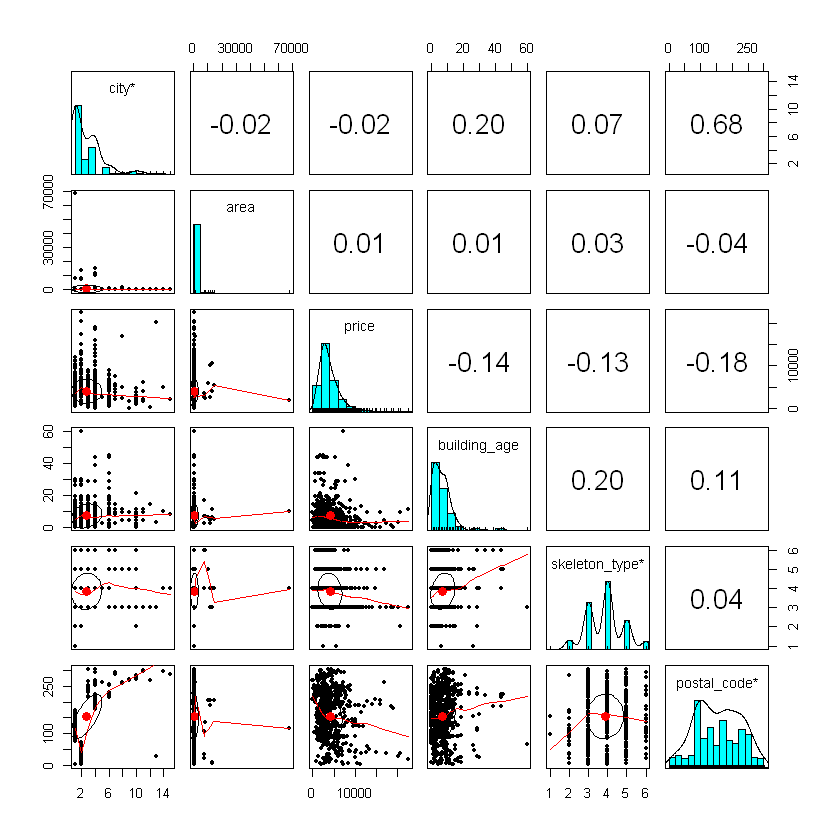

In [48]:
pairs.panels(khoozestan)

In [49]:
dim(khoozestan)

[1] 768   6

In [50]:
dummy_khoozestan = data.frame(predict(dummyVars(~.,khoozestan),khoozestan))

In [51]:

# names(dummy_khoozestan)
str(dummy_khoozestan)

'data.frame':	768 obs. of  327 variables:
 $ cityabadan                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityahvaz                         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ citybandare_emam_khomeini         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citybandare_mahshahr              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citybehbahan                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citychamran                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citydezfool                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityhandijan                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityizeh                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citykhorramshahr                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citymasjed_soleiman               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityraamshir                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityshiban                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityshoosh                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cit

In [52]:
X = dummy_khoozestan[-c(17)]
Y = dummy_khoozestan['price']

In [53]:
set.seed(313)

train_index = sample.int(nrow(dummy_khoozestan),0.8*nrow(dummy_khoozestan),replace=F)

x_train = X[train_index,]
y_train = Y[train_index,]
train = cbind(x_train,y_train)

x_test = X[-train_index,]
y_test = Y[-train_index,]
test = cbind(x_test,y_test)

In [55]:
reg.tree = rpart(formula = y_train~. , data = train, method = "anova")

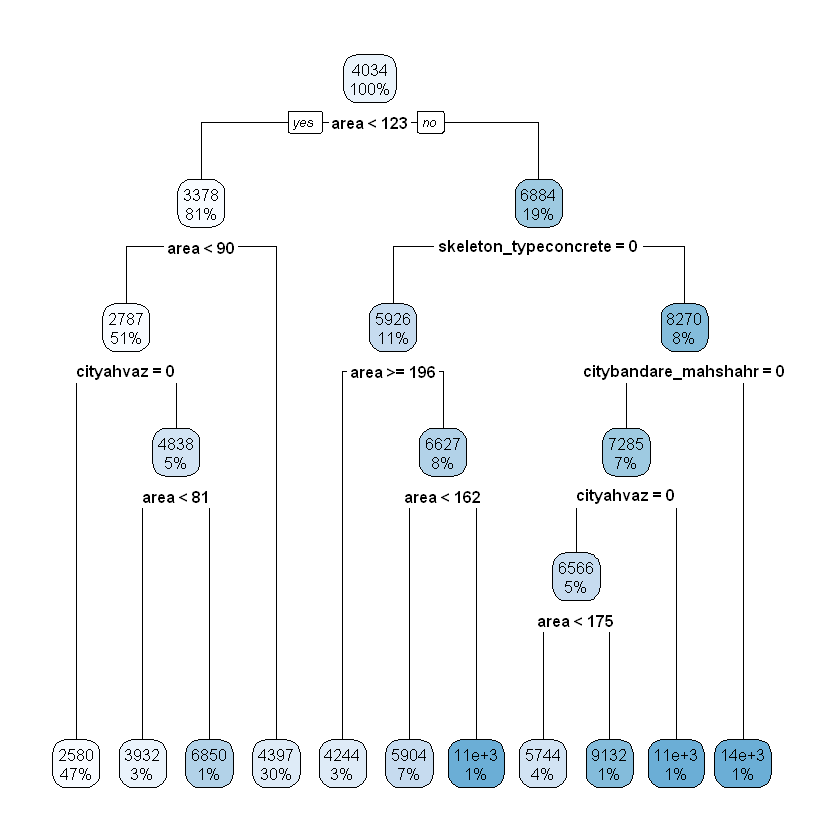

In [56]:
rpart.plot(reg.tree,split.font=2)

In [57]:
rpart.rules(reg.tree,cover = TRUE)

,y_train,,,,,,,,,,,,,,,,,,,cover
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
8,2580,when,area,<,90,,,,,,,&,cityahvaz,is,0,,,,,47%
18,3932,when,area,<,81,,,,,,,&,cityahvaz,is,1,,,,,3%
12,4244,when,area,>=,,,196,&,skeleton_typeconcrete,is,0,,,,,,,,,3%
5,4397,when,area,is,90,to,123,,,,,,,,,,,,,30%
56,5744,when,area,is,123,to,175,&,skeleton_typeconcrete,is,1,&,cityahvaz,is,0,&,citybandare_mahshahr,is,0,4%
26,5904,when,area,is,123,to,162,&,skeleton_typeconcrete,is,0,,,,,,,,,7%
19,6850,when,area,is,81,to,90,,,,,&,cityahvaz,is,1,,,,,1%
57,9132,when,area,>=,,,175,&,skeleton_typeconcrete,is,1,&,cityahvaz,is,0,&,citybandare_mahshahr,is,0,1%
29,10676,when,area,>=,,,123,&,skeleton_typeconcrete,is,1,&,cityahvaz,is,1,&,citybandare_mahshahr,is,0,1%


In [58]:
accuracy(predict(reg.tree,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.0000000000001895162,1950.191,1323.723,-751.4966,772.2657


In [59]:
accuracy(predict(reg.tree,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,440.2522,2570.189,1597.973,-1702.849,1732.753


In [61]:
deep.reg.tree = rpart(formula = y_train~. , data = train, method = "anova", cp=0)

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


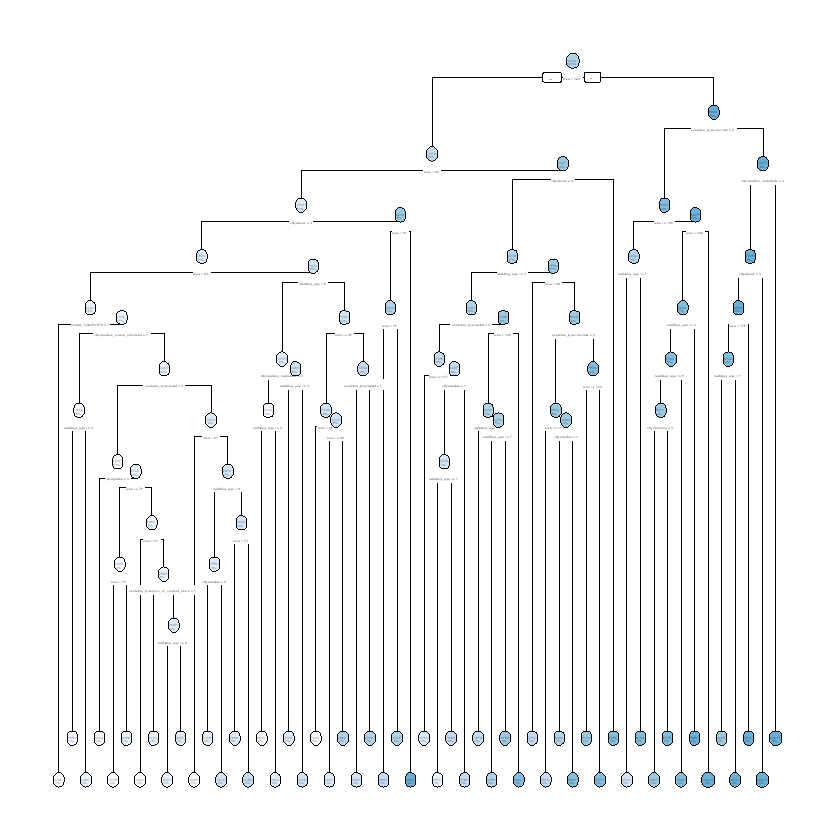

In [62]:
rpart.plot(deep.reg.tree,split.font=2)

In [63]:
rpart.rules(deep.reg.tree,cover = TRUE)

,y_train,,.1,.2,.3,.4,.5,.6,.7,.8,⋯,,.1,.2,.3,.4,.5,.6,.7,.8,cover
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
32,1299,when,area,<,80,,,&,cityahvaz,is,⋯,,,,,,,,,,1%
132,1554,when,area,<,80,,,&,cityahvaz,is,⋯,,,,,,,,,,3%
268,1694,when,area,<,80,,,&,cityahvaz,is,⋯,,,,,,,,,,2%
1076,1725,when,area,is,75,to,76,&,cityahvaz,is,⋯,,,,,,,,,,2%
136,1840,when,area,is,80,to,90,&,cityahvaz,is,⋯,0,,,,,,,,,2%
1078,1920,when,area,<,61,,,&,cityahvaz,is,⋯,,,,,,,,,,1%
140,2041,when,area,is,85,to,85,&,cityahvaz,is,⋯,,,,,,,,,,1%
270,2087,when,area,<,67,,,&,cityahvaz,is,⋯,,,,,,,,,,2%
133,2284,when,area,<,80,,,&,cityahvaz,is,⋯,,,,,,,,,,2%


In [64]:
accuracy(predict(deep.reg.tree,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,417.5097,2588.696,1514.504,-1755.251,1785.122


In [65]:
printcp(deep.reg.tree)


Regression tree:
rpart(formula = y_train ~ ., data = train, method = "anova", 
    cp = 0)

Variables actually used in tree construction:
 [1] area                               building_age                      
 [3] cityabadan                         cityahvaz                         
 [5] citybandare_emam_khomeini          citybandare_mahshahr              
 [7] citychamran                        postal_code631579                 
 [9] skeleton_typebrick_or_cement_block skeleton_typeconcrete             
[11] skeleton_typemetal                

Root node error: 4779744542/614 = 7784600

n= 614 

           CP nsplit rel error  xerror    xstd
1  0.24043159      0   1.00000 1.00187 0.13573
2  0.06285940      1   0.75957 0.80027 0.11246
3  0.04322570      2   0.69671 0.72903 0.11115
4  0.02809779      4   0.61026 0.75402 0.11718
5  0.02378874      5   0.58216 0.76969 0.11989
6  0.02041111      7   0.53458 0.76276 0.11864
7  0.01455779      8   0.51417 0.75601 0.11887
8  0.01105329    

In [66]:
pruned.deep.reg.tree = prune(deep.reg.tree,cp=deep.reg.tree$cptable[which.min(deep.reg.tree$cptable[,'xerror']),'CP'])

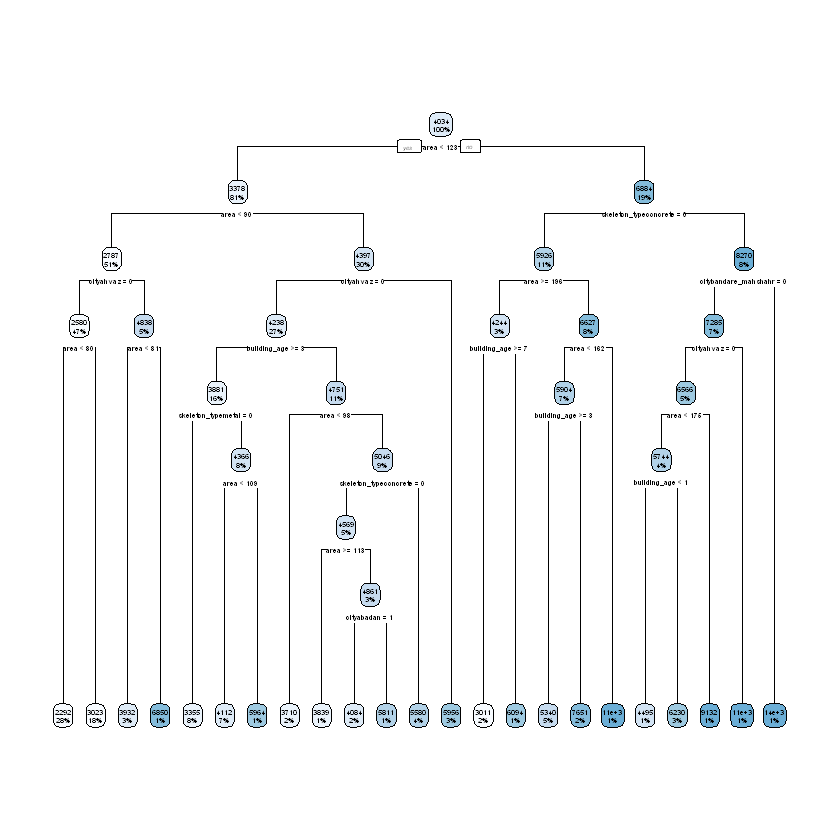

In [67]:
rpart.plot(pruned.deep.reg.tree,split.font=2)

In [68]:
rpart.rules(pruned.deep.reg.tree,cover = TRUE)

,y_train,,.1,.2,.3,.4,.5,.6,.7,.8,⋯,,.1,.2,.3,.4,.5,.6,.7,.8,cover
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
16,2292,when,area,<,80,,,&,cityahvaz,is,⋯,,,,,,,,,,28%
24,3011,when,area,>=,,,196,,,,⋯,,,,,,,,,,2%
17,3023,when,area,is,80,to,90,&,cityahvaz,is,⋯,,,,,,,,,,18%
40,3355,when,area,is,90,to,123,&,cityahvaz,is,⋯,,&,skeleton_typemetal,is,0,,,,,8%
42,3710,when,area,is,90,to,98,&,cityahvaz,is,⋯,,,,,,,,,,2%
172,3839,when,area,is,113,to,123,&,cityahvaz,is,⋯,,,,,,,,,,1%
18,3932,when,area,<,81,,,&,cityahvaz,is,⋯,,,,,,,,,,3%
346,4084,when,area,is,98,to,113,&,cityahvaz,is,⋯,,,,,,&,cityabadan,is,1,2%
82,4112,when,area,is,90,to,109,&,cityahvaz,is,⋯,,&,skeleton_typemetal,is,1,,,,,7%


In [69]:
accuracy(predict(pruned.deep.reg.tree,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.00000000000003176578,1814.089,1220.535,-579.7245,600.0375


In [70]:
accuracy(predict(pruned.deep.reg.tree,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,378.1217,2525.511,1522.48,-1517.683,1546.187


In [71]:
best.pruned.deep.reg.tree = prune(deep.reg.tree,cp=0.059847642)

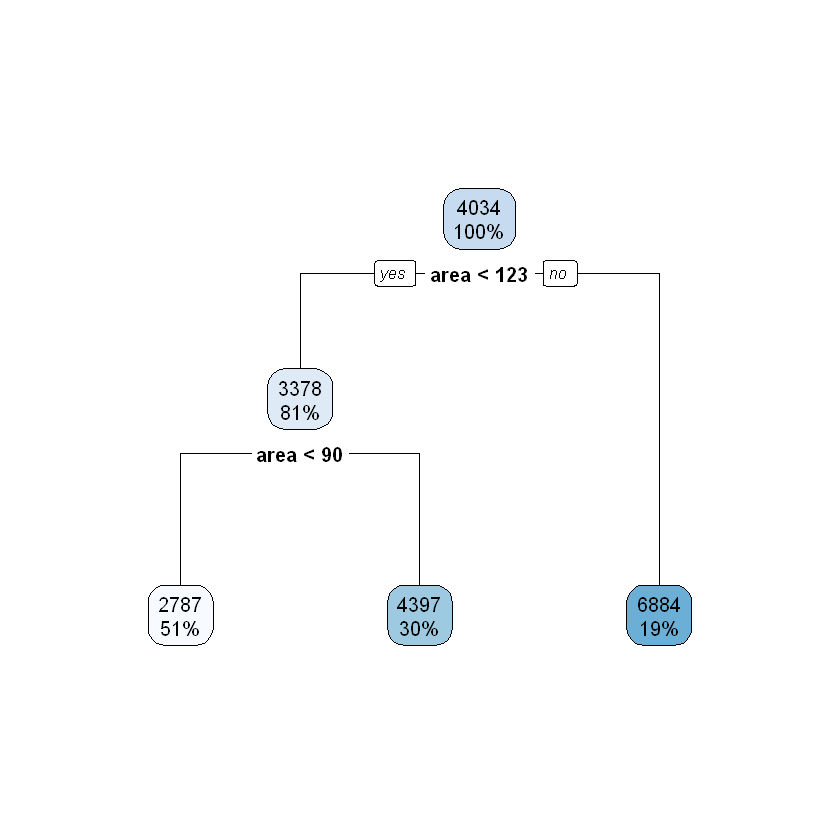

In [72]:
rpart.plot(best.pruned.deep.reg.tree,split.font=2)

In [73]:
rpart.rules(best.pruned.deep.reg.tree,cover = TRUE)

,y_train,,,,,,,cover
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,2787,when,area,<,90,,,51%
5,4397,when,area,is,90,to,123,30%
3,6884,when,area,>=,,,123,19%


In [74]:
accuracy(predict(best.pruned.deep.reg.tree,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.0000000000001971303,2328.863,1510.705,-757.6631,778.8582


In [75]:
accuracy(predict(best.pruned.deep.reg.tree,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,480.4832,2701.474,1670.479,-1846.002,1875.272


In [76]:
set.seed(101)

In [77]:
random.forest = randomForest(x=x_train, y=y_train, ntree=100, importance=T, nodesize=4)

In [78]:
summary(random.forest)

                Length Class  Mode     
call              6    -none- call     
type              1    -none- character
predicted       614    -none- numeric  
mse             100    -none- numeric  
rsq             100    -none- numeric  
oob.times       614    -none- numeric  
importance      652    -none- numeric  
importanceSD    326    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               614    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     

In [79]:
accuracy(predict(random.forest,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,52.16244,863.1559,553.6674,-209.7077,219.1601


In [80]:
accuracy(predict(random.forest,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,418.784,2484.484,1456.011,-1663.944,1690.208


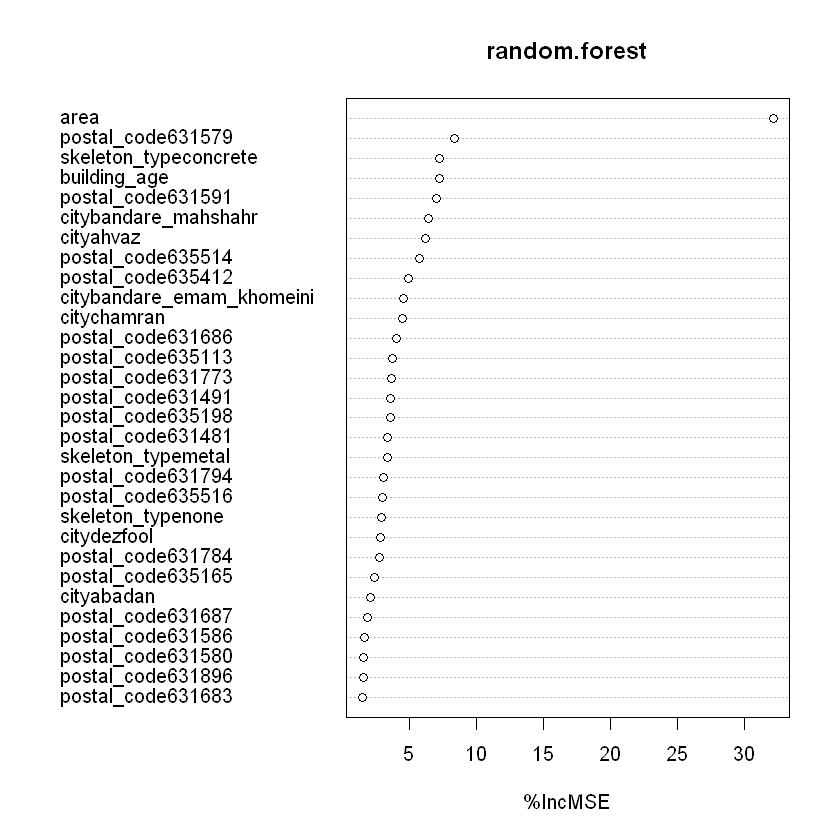

In [81]:
varImpPlot(random.forest,type=1)

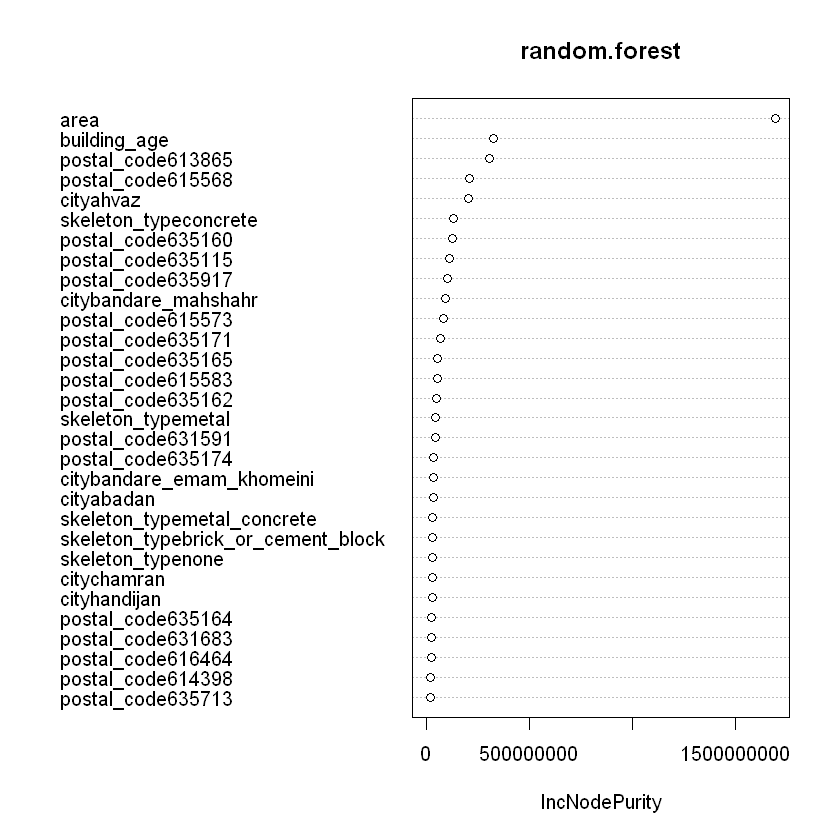

In [82]:
varImpPlot(random.forest,type=2)

 plotmo grid:    cityabadan cityahvaz citybandare_emam_khomeini
                          0         0                         0
 citybandare_mahshahr citybehbahan citychamran citydezfool cityhandijan
                    0            0           0           0            0
 cityizeh citykhorramshahr citymasjed_soleiman cityraamshir cityshiban
        0                0                   0            0          0
 cityshoosh cityshooshtar area building_age skeleton_typeadobe_or_clay
          0             0   90          5.5                          0
 skeleton_typebrick_or_cement_block skeleton_typeconcrete skeleton_typemetal
                                  0                     0                  0
 skeleton_typemetal_concrete skeleton_typenone postal_code181757
                           0                 0                 0
 postal_code191181 postal_code613373 postal_code613388 postal_code613493
                 0                 0                 0                 0
 postal_code61

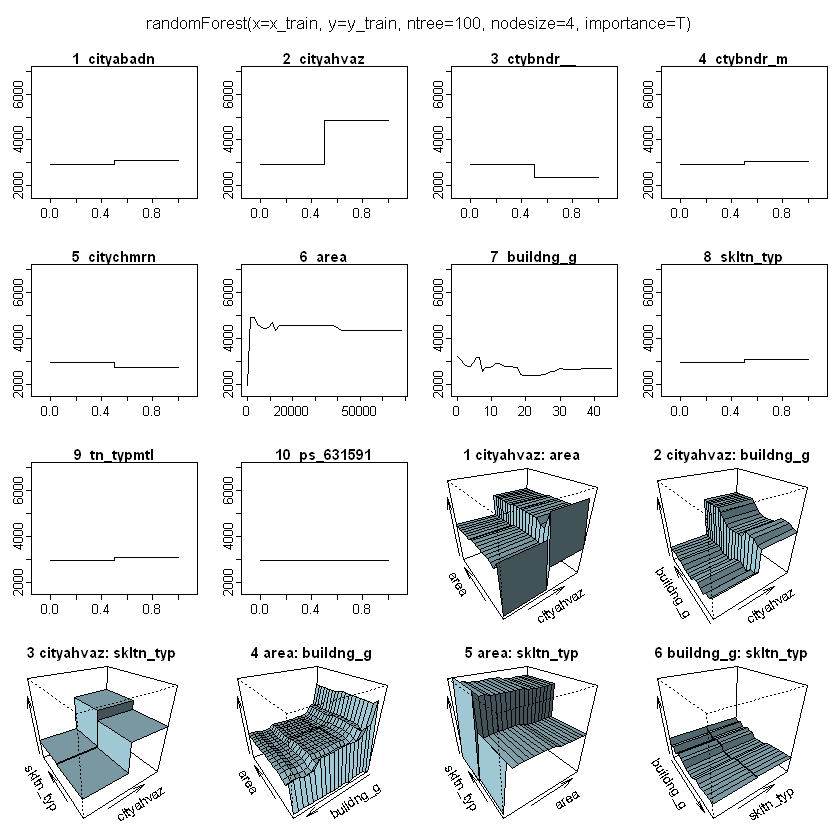

In [83]:
plotmo(random.forest)

In [84]:
set.seed(101)
boosted.tree = gbm(y_train~. , data=train, cv.folds = 10)

Distribution not specified, assuming gaussian ...


Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 13: cityshiban has no variation."
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 26: postal_code613373 has no variation."
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 28: postal_code613493 has no variation."
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 32: postal_code613669 has no variation."
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 38: postal_code613783 has no variation."
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 39: postal_code613858 has no variation."
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 52: postal_code614818 has no variation."
Warning message in gbm.fit(

In [85]:
boosted.tree

gbm(formula = y_train ~ ., data = train, cv.folds = 10)
A gradient boosted model with gaussian loss function.
100 iterations were performed.
The best cross-validation iteration was 100.
There were 326 predictors of which 10 had non-zero influence.

,var,rel.inf
,<chr>,<dbl>
area,area,73.5543144
cityahvaz,cityahvaz,13.3428569
skeleton_typeconcrete,skeleton_typeconcrete,5.1216549
building_age,building_age,3.2391268
citybandare_mahshahr,citybandare_mahshahr,2.1609306
citychamran,citychamran,1.5287157
skeleton_typenone,skeleton_typenone,0.4803045
citybandare_emam_khomeini,citybandare_emam_khomeini,0.2733623
cityabadan,cityabadan,0.1987178


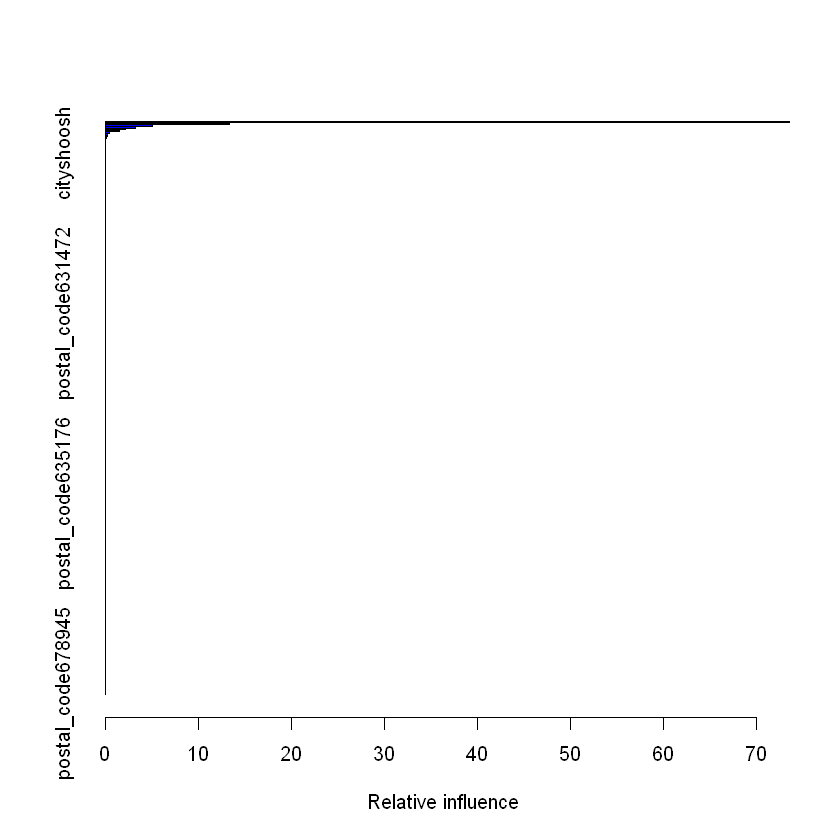

In [86]:
summary(boosted.tree)

In [87]:
accuracy(predict(boosted.tree,x_train),y_train)

Using 100 trees...




,ME,RMSE,MAE,MPE,MAPE
Test set,23.84636,2037.162,1325.04,-783.8877,804.9129


In [88]:
accuracy(predict(boosted.tree,x_test),y_test)

Using 100 trees...




,ME,RMSE,MAE,MPE,MAPE
Test set,382.8799,2447.314,1484.412,-1753.28,1779.659


In [89]:
train = train[,c(2,16,17,20)]
test = test[,c(2,16,17,20)]

In [101]:
test

,cityahvaz,area,building_age,skeleton_typeconcrete
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,75.00,2,0
7,1,88.55,3,0
9,1,119.19,2,1
17,1,63.11,15,0
20,1,103.06,60,1
23,1,74.53,4,1
25,1,79.94,8,1
26,1,96.76,19,1
34,1,102.50,6,1


In [102]:
dir

function (path = ".", pattern = NULL, all.files = FALSE, full.names = FALSE, 
    recursive = FALSE, ignore.case = FALSE, include.dirs = FALSE, 
    no.. = FALSE) 
.Internal(list.files(path, pattern, all.files, full.names, recursive, 
    ignore.case, include.dirs, no..))
<bytecode: 0x0000022889a64c78>
<environment: namespace:base>

[1] "D:/Cmder"
